In [1]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

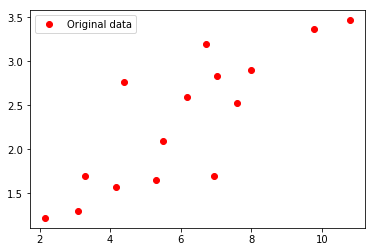

In [7]:
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
# plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

In [14]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # 下面是定义模型的输入和输出（1,1）
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)   

Epoch[20/1000], loss: 4.735969
Epoch[40/1000], loss: 3.397341
Epoch[60/1000], loss: 2.451273
Epoch[80/1000], loss: 1.782643
Epoch[100/1000], loss: 1.310092
Epoch[120/1000], loss: 0.976118
Epoch[140/1000], loss: 0.740083
Epoch[160/1000], loss: 0.573266
Epoch[180/1000], loss: 0.455369
Epoch[200/1000], loss: 0.372044
Epoch[220/1000], loss: 0.313155
Epoch[240/1000], loss: 0.271534
Epoch[260/1000], loss: 0.242118
Epoch[280/1000], loss: 0.221327
Epoch[300/1000], loss: 0.206633
Epoch[320/1000], loss: 0.196247
Epoch[340/1000], loss: 0.188907
Epoch[360/1000], loss: 0.183718
Epoch[380/1000], loss: 0.180050
Epoch[400/1000], loss: 0.177458
Epoch[420/1000], loss: 0.175624
Epoch[440/1000], loss: 0.174328
Epoch[460/1000], loss: 0.173411
Epoch[480/1000], loss: 0.172762
Epoch[500/1000], loss: 0.172303
Epoch[520/1000], loss: 0.171978
Epoch[540/1000], loss: 0.171748
Epoch[560/1000], loss: 0.171584
Epoch[580/1000], loss: 0.171468
Epoch[600/1000], loss: 0.171385
Epoch[620/1000], loss: 0.171326
Epoch[640/10

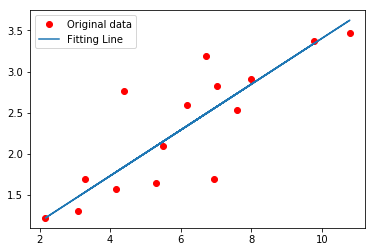

In [15]:
# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    # 得到前向传播的结果
    out = model(inputs)
    # 得到损失函数
    loss = criterion(out, target)
    # backward
    # 每次反向传播之前都要将梯度归零
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1, num_epochs, loss.item()))

model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

# 保存模型
torch.save(model.state_dict(), './linear.pth')